<a href="https://colab.research.google.com/github/GaurangPP/MyProjects/blob/main/Water_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import tensorflow as tf

In [ ]:
dataset = pd.read_csv('water_potability.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
dataset.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f31c4bd2e10>,
      dtype=object)

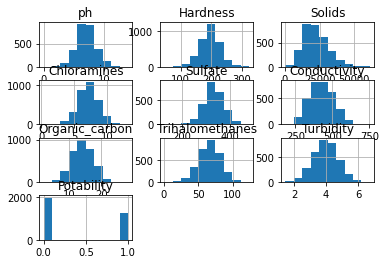

In [ ]:
dataset.hist()

In [ ]:
print(X[0])

[           nan 2.04890455e+02 2.07913190e+04 7.30021187e+00
 3.68516441e+02 5.64308654e+02 1.03797831e+01 8.69909705e+01
 2.96313538e+00]


# Preprocessing

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X = imputer.transform(X)

In [ ]:
print(X[0])

[7.08079450e+00 2.04890455e+02 2.07913190e+04 7.30021187e+00
 3.68516441e+02 5.64308654e+02 1.03797831e+01 8.69909705e+01
 2.96313538e+00]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC
classifier_SVM = SVC(kernel = 'rbf')
#Creating an instance of SVM with kernel type rbf (Radial Basis Function)
#We are using rbf for a non-linear model 
#random_state for instruction purposes
classifier_SVM.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Artificial Neural Network

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 6, activation='relu'))
ann.add(tf.keras.layers.Dense(units = 6, activation='relu'))
ann.add(tf.keras.layers.Dense(units = 6, activation='relu'))
ann.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
82/82 [==============================] - 1s 1ms/step - loss: 0.7055 - accuracy: 0.5099
Epoch 2/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6756 - accuracy: 0.5878
Epoch 3/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6686 - accuracy: 0.6218
Epoch 4/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6644 - accuracy: 0.6286
Epoch 5/100
82/82 [==============================] - 0s 2ms/step - loss: 0.6607 - accuracy: 0.6282
Epoch 6/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6575 - accuracy: 0.6336
Epoch 7/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6552 - accuracy: 0.6294
Epoch 8/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6527 - accuracy: 0.6378
Epoch 9/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6496 - accuracy: 0.6382
Epoch 10/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6472 - accuracy: 0.6397
Epoch 11/

# Results for SVM

In [ ]:
y_pred_SVM = classifier_SVM.predict(X_test)

[[388  26]
 [171  71]]
0.6996951219512195


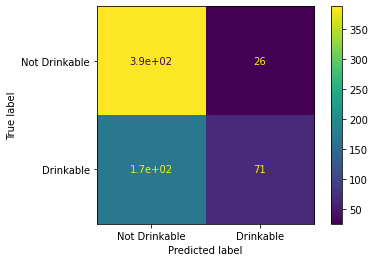

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix, accuracy_score
#Importing three classes from the same module easily
#1st is to plot, 2nd is for the matrix, 3rd is for accuracy
cm = confusion_matrix(y_test, y_pred_SVM) #Making confusion matrix
print(cm)
ConfusionMatrixDisplay(cm,['Not Drinkable','Drinkable']).plot()
#Confusion matrix, the columns represent the predicted NO and YES
#The rows represent the real NO and YES
#The matrix values represent the observations that come under it
#So (0,0) is number of observations that we predicted no and are really no
print(accuracy_score(y_test, y_pred_SVM))
#Prints accuracy as a decimal representing a percentage

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_SVM, X = X_train, y = y_train, cv=10)
print("Accuracy: (:.2f) %"+format(accuracies.mean()*100))
print("Standard Deviation: (:.2f) %"+format(accuracies.std()*100))
#Basically in k fold cross validation, you take a dataset and divide it into K folds (divisions)
#Here, we have chosen 10 folds and what we will do is use K-1 of them to train the model
#And use 1 as the test set, we then rotate so that every division becomes the test set
#Meaning we will have K test sets or in our case 10 test sets
#With these 10 variations, we can calculate the acccuracy for each and get an average accuracy
#This technique is quite accurate

Accuracy: (:.2f) %66.5267175572519
Standard Deviation: (:.2f) %1.2664625971784


# Results for ANN

In [ ]:
y_pred_ANN = ann.predict(X_test)
y_pred_ANN = (y_pred_ANN >= 0.5)

[[364  50]
 [149  93]]
0.6966463414634146


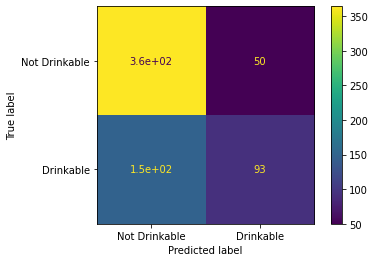

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix, accuracy_score
#Importing three classes from the same module easily
#1st is to plot, 2nd is for the matrix, 3rd is for accuracy
cm = confusion_matrix(y_test, y_pred_ANN) #Making confusion matrix
print(cm)
ConfusionMatrixDisplay(cm,['Not Drinkable','Drinkable']).plot()
#Confusion matrix, the columns represent the predicted NO and YES
#The rows represent the real NO and YES
#The matrix values represent the observations that come under it
#So (0,0) is number of observations that we predicted no and are really no
print(accuracy_score(y_test, y_pred_ANN))
#Prints accuracy as a decimal representing a percentage